<a href="https://colab.research.google.com/github/ocarane/ml_finished_projects/blob/main/Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd

uri = "https://raw.githubusercontent.com/ocarane/machine_learning/main/car-prices.csv"

dados = pd.read_csv(uri)

dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [50]:
from os import SEEK_DATA
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [51]:
a_troca ={
    "yes": 1,
    "no": 0
}

dados.sold = dados.sold.map(a_troca)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [52]:
from datetime import datetime

ano_atual = datetime.today().year
dados["idade"] = ano_atual - dados["model_year"]
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,idade
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [53]:
dados["Km_por_ano"] = dados["mileage_per_year"] * 1.60934
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,idade,Km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [54]:
dados = dados.drop(["Unnamed: 0","mileage_per_year", "model_year"], axis=1)
dados.head()

,price,sold,idade,Km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [55]:
mapa = {
    "sold": "vendido",
    "price": "preco",

}
dados.rename(columns=mapa, inplace=True)
dados.head()

,preco,vendido,idade,Km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


##Balanceamento

In [56]:
dados.vendido.value_counts()

vendido
1    5800
0    4200
Name: count, dtype: int64

In [57]:
x = dados[["Km_por_ano", "idade", "preco"]]
y = dados[["vendido"]]

seed = 10
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state=seed, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

#Criando um modelo
model = LinearSVC()

#Treinando o modelo
model.fit(train_x, train_y)

#Calculando a acurácia
acuracia = model.score(test_x, test_y)

print("A acurácia foi de %.2f%%" % (acuracia * 100))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia foi de 58.00%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [58]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
Acuracia = dummy_stratified.score(test_x, test_y)
print("A acurácia foi de %.2f%%" % (Acuracia * 100))

A acurácia foi de 58.00%


In [59]:
import numpy as np
from os import SEEK_DATA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed = 0
np.random.seed(seed)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y,random_state=seed, test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

#Criando um modelo
model = SVC(gamma = 'auto')

#Treinando o modelo
model.fit(train_x, train_y)

#Calculando a acurácia
Acuracia = model.score(test_x, test_y)

print("A acurácia foi de %.2f%%" % (Acuracia * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia foi de 76.68%


In [60]:
seed = 0
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state=seed, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

from os import SEEK_DATA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth = 3, random_state = seed)
model.fit(raw_train_x, train_y)

previsoes = model.predict(raw_test_x)
acuracia = accuracy_score(test_y, previsoes)
print("A acurácia foi de %.2f%%" % (acuracia * 100))

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 78.84%


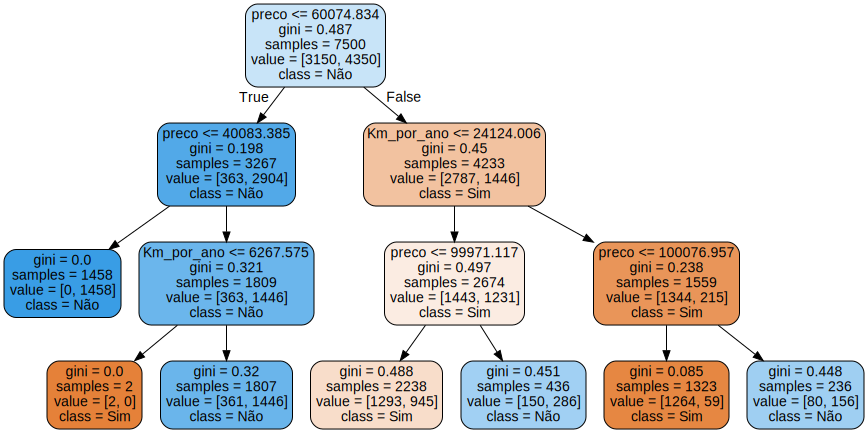

In [61]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, feature_names=features, class_names = ["Sim", "Não"])
graph = graphviz.Source(dot_data)
graph

In [65]:
EcoSport = [20000, 20, 10000]
EcoSport = scaler.transform([EcoSport])
previsoes = model.predict(EcoSport)
print(previsoes)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
